In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
df_rsumm = pd.read_csv("reviews_athens.csv")
print("reviews_summary : " + str(df_rsumm.shape))
df_rsumm

reviews_summary : (406607, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10595,271535,2011-05-20,189305,Pamela,"The apartment was wonderful, fully equiped, be..."
1,10595,1994237,2012-08-15,289831,Andrey,Emmanouil was an excellent host. He provided u...
2,10595,4678609,2013-05-20,2635427,Ahmet,"Manos is a very good host, he is kind and help..."
3,10595,12502994,2014-05-04,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,19482948,2014-09-13,6737784,Mariana,Fantastic accommodation very well located to v...
...,...,...,...,...,...,...
406602,52744529,480858944526547665,2021-10-25,428203290,Daniel,"The place is brand new, tastefully furnished a..."
406603,52744828,477946268646295799,2021-10-21,38335433,Dwight,Great and clean apartment. All devices were ne...
406604,52752849,475078723035808532,2021-10-17,426629667,Yana,Thank you for a five star stay! We felt comple...
406605,52809823,480142876553393403,2021-10-24,269071645,Vasiliki,Ευχαριστω ολα ηταν πολυ καλα.


In [2]:
import datetime
def mapper(month):
    date = datetime.datetime(2000, month, 1)  # You need a dateobject with the proper month
    return date.strftime('%b') 

In [3]:
df_rsumm['date'] = pd.to_datetime(df_rsumm['date'])
df_rsumm['year'] = df_rsumm['date'].dt.year
df_rsumm['month'] = df_rsumm['date'].dt.month
df_rsumm['day'] = df_rsumm['date'].dt.day

df_rsumm['year'] = df_rsumm['year'].astype(int)
df_rsumm['month'] = df_rsumm['month'].astype(int)
df_rsumm['day'] = df_rsumm['day'].astype(int)
df_rsumm.sort_values(['year', 'month'], ascending=[True, True],axis=0,inplace=True)

In [4]:
df_rsumm['month'] = df_rsumm['month'].apply(mapper)

In [5]:
df_rsumm_orig = df_rsumm.copy(deep=False) 

In [6]:
dropped = ['reviewer_name','comments']
df_rsumm.drop(dropped,axis=1,inplace=True)

In [7]:
df_rsumm['year'].value_counts()

2019    120965
2018     78365
2021     77190
2020     52196
2017     42702
2016     20092
2015      9531
2014      3693
2013      1393
2012       359
2011       117
2010         4
Name: year, dtype: int64

In [8]:
df_2019 = df_rsumm[df_rsumm['year'] == 2019]
df_2018 = df_rsumm[df_rsumm['year'] == 2018]
df_2017 = df_rsumm[df_rsumm['year'] == 2017]
df_2020 = df_rsumm[df_rsumm['year'] == 2020]

In [9]:
dropped = ['year','day','id','date','listing_id']
df_2019.drop(dropped,axis=1,inplace=True)
df_2018.drop(dropped,axis=1,inplace=True)
df_2017.drop(dropped,axis=1,inplace=True)
df_2020.drop(dropped,axis=1,inplace=True)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
df_2020["count"] = df_2020.groupby("month")["reviewer_id"].transform('count')
df_2019["count"] = df_2019.groupby("month")["reviewer_id"].transform('count')
df_2018["count"] = df_2018.groupby("month")["reviewer_id"].transform('count')
df_2017["count"] = df_2017.groupby("month")["reviewer_id"].transform('count')

<ipython-input-10-9a2a7c08a516>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020["count"] = df_2020.groupby("month")["reviewer_id"].transform('count')
<ipython-input-10-9a2a7c08a516>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019["count"] = df_2019.groupby("month")["reviewer_id"].transform('count')
<ipython-input-10-9a2a7c08a516>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [11]:
dropped = ['reviewer_id']
df_2020.drop(dropped,axis=1,inplace=True)
df_2019.drop(dropped,axis=1,inplace=True)
df_2018.drop(dropped,axis=1,inplace=True)
df_2017.drop(dropped,axis=1,inplace=True)
df_2020 = df_2020.drop_duplicates()
df_2019 = df_2019.drop_duplicates()
df_2018 = df_2018.drop_duplicates()
df_2017 = df_2017.drop_duplicates()
df_2020=df_2020.reset_index(drop=True)
df_2019=df_2019.reset_index(drop=True)
df_2018=df_2018.reset_index(drop=True)
df_2017=df_2017.reset_index(drop=True)

df_2020

,month,count
0,Jan,6866
1,Feb,6942
2,Mar,4209
3,Apr,456
4,May,1039
5,Jun,1837
6,Jul,4876
7,Aug,7665
8,Sep,7180
9,Oct,6587


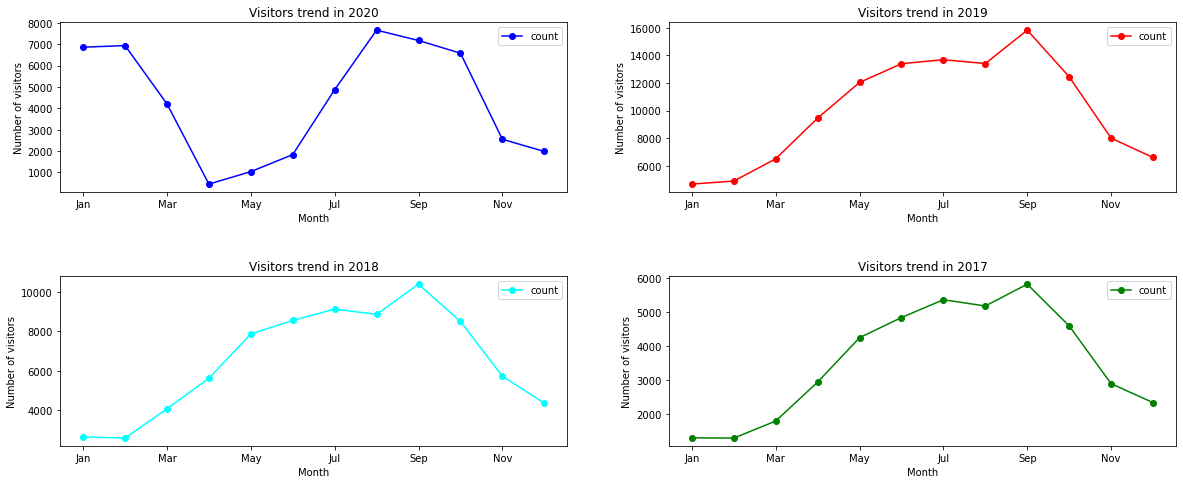

In [12]:

fig = plt.figure(figsize=(20, 6))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

df_2020.plot(kind='line', color='blue', x='month',y='count',marker='o',ax=ax0) # add to subplot 1
ax0.set_title('Visitors trend in 2020')
ax0.set_xlabel('Month')
ax0.set_ylabel('Number of visitors')

df_2019.plot(kind='line', color='red', x='month',y='count',marker='o',ax=ax1) # add to subplot 2
ax1.set_title('Visitors trend in 2019')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of visitors')

df_2018.plot(kind='line', color='cyan', x='month',y='count',marker='o',ax=ax2) # add to subplot 3
ax2.set_title('Visitors trend in 2018')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of visitors')

df_2017.plot(kind='line', color='green', x='month',y='count',marker='o',ax=ax3) # add to subplot 4
ax3.set_title('Visitors trend in 2017')
ax3.set_xlabel('Month')
ax3.set_ylabel('Number of visitors')

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5)
plt.show()

we can see September is the most demanded season 2019-2017 
ans august is demand season in 2020
janurayand feb is the off season in 2019-17
for 2020 its april to may